In [1]:
%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import control as c

## Aufgabe 3
Im Folgenden werden 2 Regler entworfen. Zunächst ein einfacher P Regler, danach ein PI Regler. Die Transferfunktion des P Reglers lautet $ \frac{v(s)}{u(s)} = K $, für den PI Regler gilt $\frac{v(s)}{u(s)} = \frac{K_pK_is+1}{K_is}$

## P Regler

In [2]:
m = 16.49331431
As = 1.256637061
hs = 5
cp = 1078

#charakteristische Formal für das PT1 Verhalten
def func(x, K, T):
     return K*(1 - np.e**(-x/T))

#Kooeffizientenvergleich liefert werte für T und K
q = 2000
q_max = 2000
T = cp*m/(As*hs)
K = q/(As*hs)/q # skaliere k mit eingangsleistung


In [3]:
#transferfunktion von PT1
Gs = c.tf([K],[T,1])
Gs


  0.1592
----------
2830 s + 1

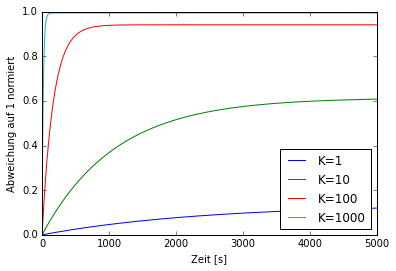

In [4]:
#lege System mit verschiedenen Werten für K an
P_list = [1, 10, 100, 1000]
for k in P_list:
    Gr = c.tf([k],[1])
    tf_controller_output = c.feedback(Gr*Gs)
    step_data = c.step_response(tf_controller_output,np.arange(0,5000,1))
    plt.plot(step_data[0],step_data[1], label="K="+str(k))
        
plt.xlabel('Zeit [s]')
plt.ylabel('Abweichung auf 1 normiert')
plt.legend(loc=4)

Die obrige Grafik zeigt das Verhalten des geschlossenen Regelkreises mit einem P Regler. Für K wurden die Werte 1, 10, 100, 1000 gewählt. Es ist zu erkennen, dass mit höherem K das System schneller und genauer geregelt wird. Für kleine K wie z.B. 10 kann der Zielwert nicht erreicht werden. Da die Regelung der Leistung direkt von K abhängt ist darauf zu achten, dass K so gewählt werden muss, dass die maximale Leistung nicht überschritten wird.


Polnullstellen für k= 1: (array([-0.00040963]), array([], dtype=float64))
Polnullstellen für k= 10: (array([-0.00091583]), array([], dtype=float64))
Polnullstellen für k= 100: (array([-0.00597775]), array([], dtype=float64))
Polnullstellen für k= 1000: (array([-0.05659701]), array([], dtype=float64))


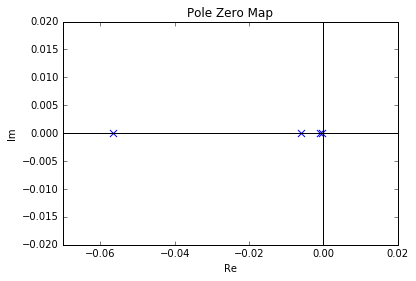

In [5]:
#lege System mit verschiedenen Werten für K an
P_list = [1, 10, 100, 1000]
for k in P_list:
    Gr = c.tf([k],[1])
    tf_controller_output = c.feedback(Gr*Gs)
    a = c.pzmap.pzmap(tf_controller_output) # pole/zero map, Polnullstellendiagram
    print("Polnullstellen für k= "+ str(k) + ": " + str(a))


Bei Betrachtung der Polstellen der für die gewählten Werte für K ist zu erkennen, dass die Realanteile immer negativ sind un die Imaginärteile immer 0. Dadruch sind die betrachteten P Regler stabil für das gegebene System.

## PI Regler

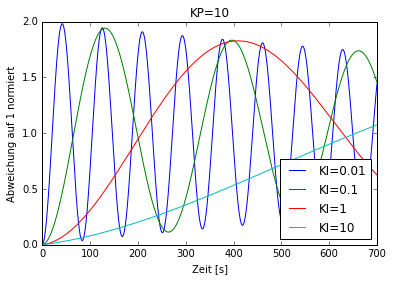

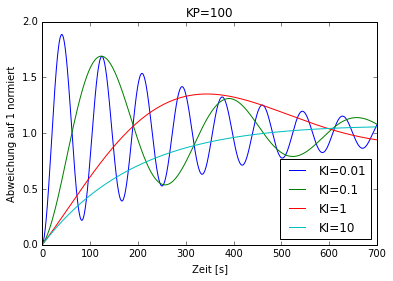

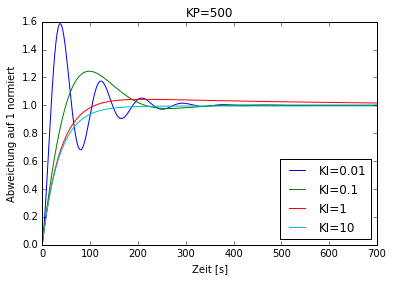

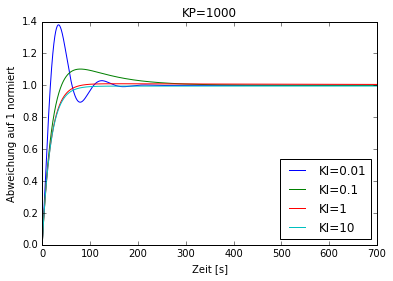

In [6]:
KI_list = [0.01, 0.1, 1, 10]
KP_list = [10, 100, 500, 1000]
for p in KP_list:
    for i in KI_list:
    
        P = c.TransferFunction(p,1)
        I = c.TransferFunction(1,[i,0])
        tf_controller_output = c.feedback((P+I)*Gs)
        step_data = c.step_response(tf_controller_output,np.arange(0,700,0.1))
        plt.plot(step_data[0],step_data[1], label="KI="+str(i))
    plt.xlabel('Zeit [s]')
    plt.ylabel('Abweichung auf 1 normiert')
    plt.title("KP="+str(p))
    plt.legend(loc=4)
    plt.show()

DIe obrigen Diagramme zeigen Spungantworten des geschlossenen Systems mit einem PI Regler. Die Werte $KI$ und $KP$ werden je nach Diagramm variiert. Es ist zu sehen, dass mti größerem KP das System schnell den Zielwert erreicht. Mit steigenden KI wird der Zeilwert später erreicht und ein Überschwingen des Systems wird vermieden, was bei kleinen KI der Fall ist. 


Polnullstellen für k= 1000: (array([-0.0263399, -0.0021353]), array([-0.002]))


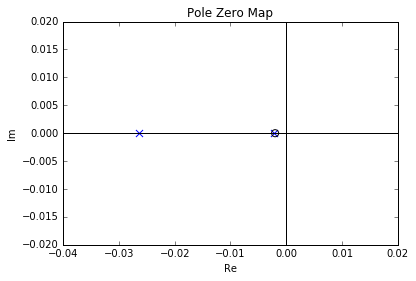

In [7]:

P = c.TransferFunction(500,1)
I = c.TransferFunction(1,[1,0])
tf_controller_output = c.feedback((P+I)*Gs)
a = c.pzmap.pzmap(tf_controller_output) # pole/zero map, Polnullstellendiagram
print("Polnullstellen für k= "+ str(k) + ": " + str(a))

Das Polnullstellendiagram des Systems mit einem PI Controller mit Parametern $KI=1$ und $KP=500$. Der Realanteil ist stehts negativ und ein Imaginäranteil ist nicht vorhanden.  Dadurch zeigt, dass das System nicht schwingt. Bei kleinerern KI wie z.B. $KI=0.1$ ist ein Imaginärteil vorhanden bei negativem Realanteil. Bei dieser Parameterwahl würde das System überschwingen, wäre jedoch asymptotisch stabil.

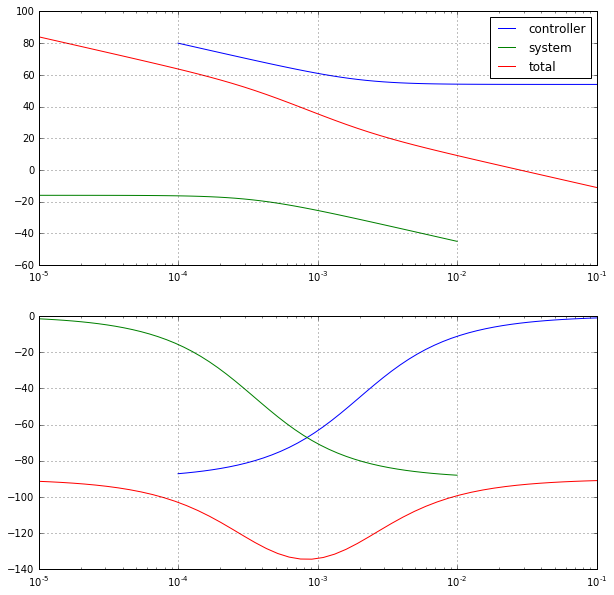

In [8]:

bodeplot_data_PI = c.bode_plot(P+I,dB=True,Plot=False)
bodeplot_data_sys = c.bode_plot(Gs,dB=True,Plot=False)
bodeplot_data_total = c.bode_plot((P+I)*Gs,dB=True,Plot=False)
plt.figure(figsize=[10,10])
plt.subplot(211)
plt.grid()
#pp.axis([0.1,100,-100,45])
plt.semilogx(bodeplot_data_PI[2],bodeplot_data_PI[0])
plt.semilogx(bodeplot_data_sys[2],bodeplot_data_sys[0])
plt.semilogx(bodeplot_data_total[2],bodeplot_data_total[0])
plt.legend(["controller","system","total"])
plt.subplot(212)
plt.semilogx(bodeplot_data_PI[2],bodeplot_data_PI[1])
plt.semilogx(bodeplot_data_sys[2],bodeplot_data_sys[1])
plt.semilogx(bodeplot_data_total[2],bodeplot_data_total[1])
plt.grid()

Ist die Phase des offenen Regelkreises bei $-180°$, dann ist die zugehörige Frequenz kritisch. Wenn dann der Betrag der Übertragungsfunktion kleiner $0dB$ ist, so ist das System stabil. Die obrige Grafik Zeigt den Bode-Plot für $KI=0.1$ und $KP=500$. Es ist zu erkennen, dass das System mit den beispielhaft gewählten Parametern stabil ist, da der Wert von $-180°$ nie unterschritten wird. Laut obriger Bedingung ist das System somit stabil.

## Zusammenfassung

Der Fit an die Messdaten eines System geschahen über eine Lösung der Differentialgleichung. Die erhaltene Mase sowie Oberfläche wichen in einem akzeptablen Bereich von den ausgerechneten (realen) Werten ab.

Das zu analysierende System wieß ein $PT_1$ verhalten auf. Getestet wurden sowohl ein P Regler als auch ein PI Regler, jeweils mit verschiedenen Parametern. Wie oben beschrieben weißen diverse Kombinationen der Parameter unterschiedliche Stabilitäten und Geschwindigkeiten auf. Die Leistung von 2kW darf nicht überschritten werden um ein realistisches System zu erhalten. Eine Totzeit des System ist nicht vorgesehen, wäre aber in der Realität von Bedeutung, da bei erhöhter Heizleistung der Glastubus nicht augenblicklich die entsprechende Temperatur erreicht.

### Mögliche Verbesserung
Die für den P und PI Regler beispielhaft gewählten Parameter sind nicht optimal. Für optimale Parameter müsste eine die Suche verfeinert werden und eine genauere Analyse erfolgen. Zudem ist immer darauf zu achten, dass die zu Regelde Leistung nicht 2kW übersteigt.

### Hilfmittel
Zu Hilfe genommen wurden die Websites: 

wolframalpha.com 

wikipedia.com 

techniker-forum.de